# Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = "C:/Users/guzma/OneDrive/Documents/TEC/S6/MA2007/Reto/noaa_ai_workshop/IntroNotebooks/uke_eggedal_data_challenge.pkl"
df = pd.read_pickle(file)

## Data Cleaning

In [3]:
# print(df.keys())
df1 = pd.DataFrame(df['flow'])
df1.columns = ['flow']
df2 = pd.DataFrame(df['obs_tas'])
df2.columns = ['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7', 'tas_8']
df3 = pd.DataFrame(df['flow_dates'])
# df4 = pd.DataFrame(df['obs_lon_lat']) # ignore
df5 = pd.DataFrame(df['obs_pr'])
df5.columns = ['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8']
df6 = pd.DataFrame(df['obs_dates'])
df6.columns = ['dates']

In [4]:
df['obs_lon_lat']

[9.37, 60.23]

In [5]:
data = pd.concat([df1, df2], axis=1, join='inner')
data = pd.concat([data, df5], axis=1, join='inner')

In [6]:
data.index = df3.index

In [7]:
data['obs_dates'] = df6['dates']
data.head()

,flow,tas_0,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,obs_dates
1958-01-04,1.723781,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1958-01-04
1958-01-05,0.960882,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1958-01-05
1958-01-06,0.001000,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1958-01-06
1958-01-07,0.001000,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1958-01-07
1958-01-08,0.316796,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1958-01-08


In [8]:
data['obs_bool'] = data['obs_dates'] == data.index
data.head(-10)

,flow,tas_0,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,...,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,obs_dates,obs_bool
1958-01-04,1.723781,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1958-01-04,True
1958-01-05,0.960882,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1958-01-05,True
1958-01-06,0.001000,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,...,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1958-01-06,True
1958-01-07,0.001000,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,...,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1958-01-07,True
1958-01-08,0.316796,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,...,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1958-01-08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-12,6.737757,-4.900000,-4.2,-2.0,-3.400000,-3.500000,-2.200000,-2.7,-1.5,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False
2016-12-13,5.645193,-10.200000,-10.1,-7.8,-9.200000,-9.300000,-7.200000,-8.0,-7.0,-6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False
2016-12-14,5.052036,-10.200000,-11.1,-9.6,-10.600000,-10.600000,-9.600000,-9.7,-9.1,-8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False
2016-12-15,5.617270,-10.800000,-11.0,-10.7,-10.600000,-10.800000,-10.100000,-10.0,-9.7,-9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False


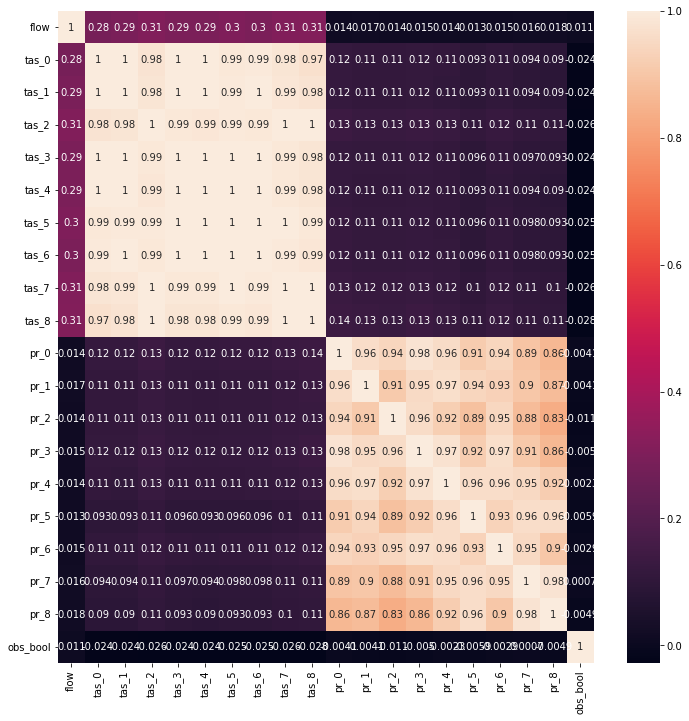

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 12))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Primero estaremos creando dos dataframes. Una tendra nuestra variable objetivo **flow** y la otra tendra las variables predictoras.

In [9]:
X = data.drop(['flow', 'obs_dates', 'obs_bool'], axis=1)
y = data['flow']

## Clustering

Ahora se tendra que reducir la dimension de nuestras variables predictoras. En este caso, tenemos 18 variables predictoras, lo cual nosotros reduciremos en dimensiones e intentaremos no perder mucho de la explicacion de estos datos al reducir dimensiones.

### PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
per = [0.99]*len(np.cumsum(pca.explained_variance_ratio_))

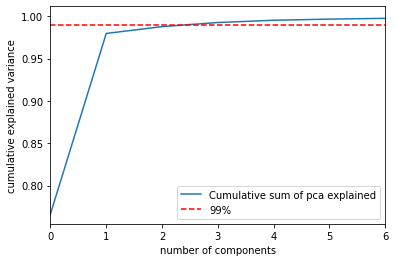

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative sum of pca explained')
plt.plot(per, linestyle = '--', c='r', label='99%')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim([0, 6])
plt.legend()
plt.show()

Como podemos observar, al utilizar 2 componentes nosotros explicamos alrededor de 98% de los datos.

In [11]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(21542, 18)
(21542, 2)


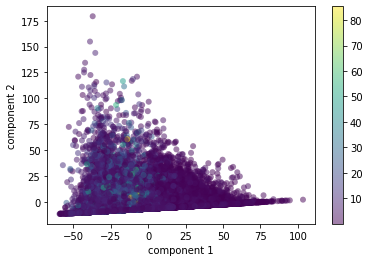

In [45]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Clustering

In [12]:
from sklearn.cluster import KMeans

K = 2 # Choose the number of clusters for KMeans.

# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)

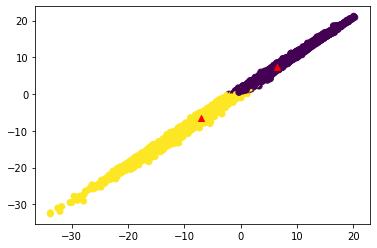

In [13]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

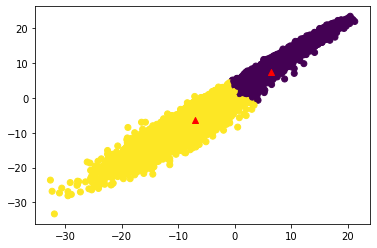

In [14]:
plt.scatter(X.iloc[:,1],X.iloc[:,2],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

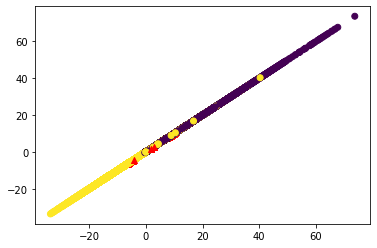

In [15]:
for i in range(len(X.columns)-1):
    plt.scatter(X.iloc[:,i+1],X.iloc[:,i+1],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i+1],centers[:,i+1],marker = '^', c = 'r')
plt.show()

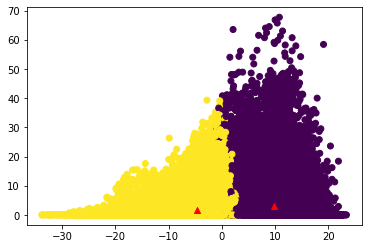

In [16]:
for i in range(8):
    plt.scatter(X.iloc[:,i],X.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
plt.show()

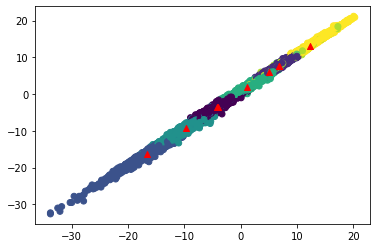

In [17]:
K = 9 # The only thing that needs to be changed

kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

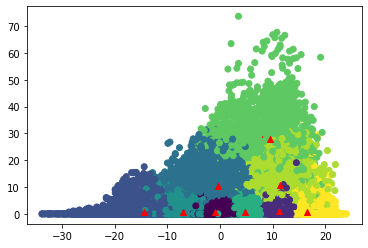

In [18]:
for i in range(9):
    plt.scatter(X.iloc[:,i],X.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
plt.show()

## Observaciones sobre tiempo

In [19]:
Temp = X[['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7',
       'tas_8']]
Pres = X[['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7',
       'pr_8']]

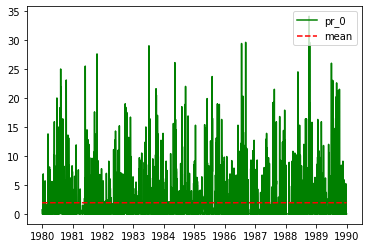

In [20]:
mean = [np.mean(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0])]*len(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')])
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0], color='g', label='pr_0', zorder=1)
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

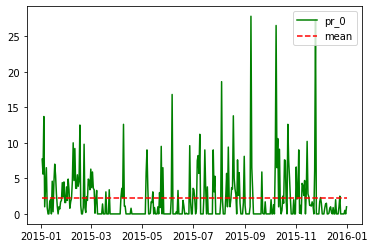

In [21]:
mean = [np.mean(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016'),0])]*len(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016')])
plt.plot(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016'),0], color='g', label='pr_0', zorder=1)
plt.plot(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

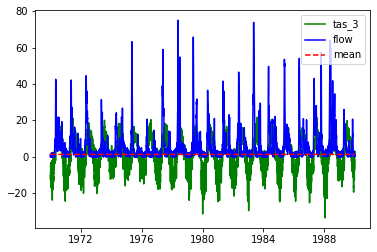

In [22]:
mean = [np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3])]*len(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')])
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3], color='g', label='tas_3', zorder=1)
plt.plot(y.iloc[(y.index > '1970') & (y.index < '1990')], color='b', label='flow', zorder=1)
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

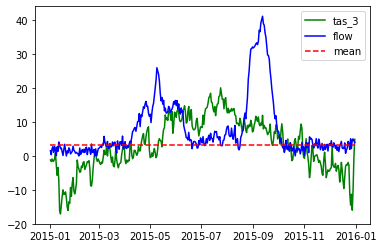

In [23]:
mean = [np.mean(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016'),3])]*len(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016')])
plt.plot(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016'),3], color='g', label='tas_3', zorder=1)
plt.plot(y.iloc[(y.index > '2015') & (y.index < '2016')], color='b', label='flow', zorder=1)
plt.plot(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

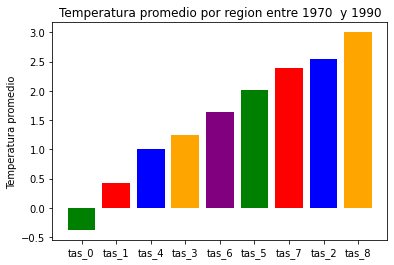

In [24]:
mean = []
for i in range(len(Temp.columns)):
    mean.append(np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),i]))

Temp_sorted = [x for _, x in sorted(zip(mean, Temp.columns))]
mean_sorted = sorted(mean)
plt.bar(Temp_sorted,mean_sorted,linestyle ='--', label='mean', color=['green','red','blue','orange','purple'])
plt.title("Temperatura promedio por region entre 1970  y 1990")
plt.ylabel('Temperatura promedio')
plt.show()

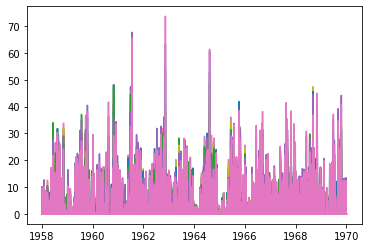

In [25]:
for i in range(len(Pres.columns)):
    # plt.plot(Pres.iloc[(Pres.index > '1970') & (Pres.index < '2010'),i], label=Pres.columns[i])
    plt.plot(Pres.iloc[(Pres.index < '1970'),i])
    plt.plot(np.mean(Pres.iloc[(Pres.index < '1970'),i]),'--')
    # plt.legend()
plt.show()

## Complejos Simpliciales

Primero se importan las librerias que se estaran utilizando para hacer el analisis sobre complejos simpliciales.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

Se utiliza el algoritmo de pca para poder obtener una reduccion en dimensiones de nuestra base de datos y poder hacer complejos que se pueden visualizar.

In [14]:
pca = PCA(2)  # project from 18 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(21542, 18)
(21542, 2)


In [15]:
X.shape

(21542, 18)

Eliminamos variables que no nos ayudarian en los complejos, como lo son fechas y valores booleanos de las fechas.

In [16]:
mov_data = data.drop(['obs_bool','obs_dates'],axis=1)

Creamos 20 diferentes matrices de distancia para poder identificar con mayor visualizacion todos los datos. La razon por la cual no se hace una general es porque esta tendria muchos datos y nos termina creando una matriz dificil de leer.

En este caso, se estara analisando toda la informacion, incluyendo el flow.

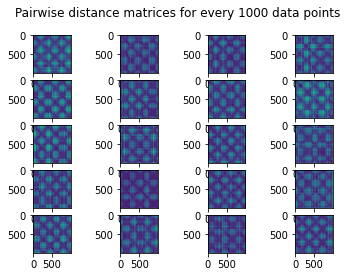

In [16]:
# splits = np.array_split(X, 50)
# plt.figure(figsize=(10,10))
plt.figure(0)
count = 0
for i in range(5):
    for j in range(4):
        ax = plt.subplot2grid((5,4), (i,j))
        ax =  pairwise_distances(mov_data.iloc[0+1000*count:1000+1000*count,:])
        count += 1
        plt.suptitle('Pairwise distance matrices for every 1000 data points')
        plt.imshow(ax)
plt.show()

Para esta matriz de distancia no se estara incluyendo el flow.

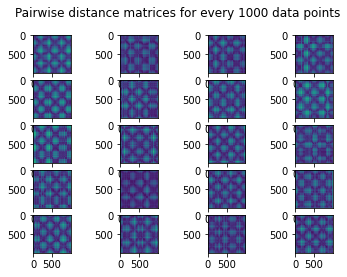

In [18]:
# splits = np.array_split(X, 50)
# plt.figure(figsize=(10,10))
plt.figure(0)
count = 0
for i in range(5):
    for j in range(4):
        ax = plt.subplot2grid((5,4), (i,j))
        ax =  pairwise_distances(X.iloc[0+1000*count:1000+1000*count,:])
        count += 1
        plt.suptitle('Pairwise distance matrices for every 1000 data points')
        plt.imshow(ax)
plt.show()

In [17]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

### Complejos simples

Se obtiene una muestra aleatoria de la base de datos que se redujo con pca para poder procesar estos datos en un tiempo no muy largo.

In [18]:
test = np.random.choice(projected.shape[0],100)
test

array([ 4958,  5479,  4505,  9126, 14463, 12707, 14339, 13721, 11943,
       20412, 11499,  4306, 20246,   672,  6753,  6172,  5956, 18936,
       16965,   269,  5477, 17688, 20469, 11503, 12927, 20899,  2809,
       17319,  3931, 16300, 13638,  3998,  4777,  4694, 18912, 18242,
       13392,  6712,  8011,  6340, 15120, 13500, 13207,  4951,  8647,
       14391, 19856,  7253, 12706,  4950,  8348,  9175, 11656, 15666,
        6883, 19993, 12438, 11536,  3207, 15487, 17439, 19290, 16607,
       16181,  9507,  2011, 16209,  1826, 16163,  9901,  2807, 19942,
       13325, 13011, 19585,  7114, 19112,  7649, 14947, 14663,   102,
       21137, 11397, 19050, 18491,  6472,  5383, 19827,  9628, 14619,
       19023,  6168, 12110,  3530,  8451,  7385, 15414,  1952,  1508,
       15877])

In [19]:
size = 2000

In [20]:
sample = projected[np.random.choice(projected.shape[0], size),:]

In [21]:
sample.shape

(2000, 2)

In [23]:
D = pairwise_distances(sample)

Observamos que con el radio de 3 se puede hacer una conexion muy buena entre todos los puntos del simplejo.

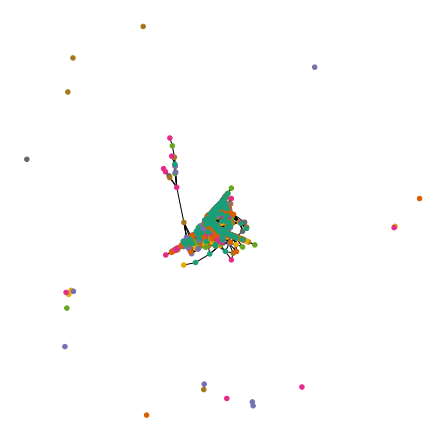

In [24]:
plt.figure(figsize=(6,6))
r = 8
G = create_simplicial_complex(D,r)
# pos = nx.circular_layout(G)
nx.draw(G, node_color=range(size), node_size=20, cmap=plt.cm.Dark2_r)
plt.show()

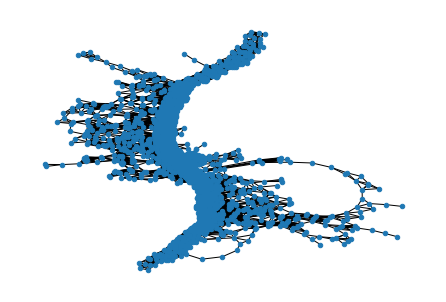

In [23]:
r = 3
G = create_simplicial_complex(D,r)
nx.draw_kamada_kawai(G, node_size=20) # node_size es para tamaño de los nodos individuales.

Observamos que distribucion toman nuestros datos de muestra inicialmente sin hacer ninguna conexion entre estos.

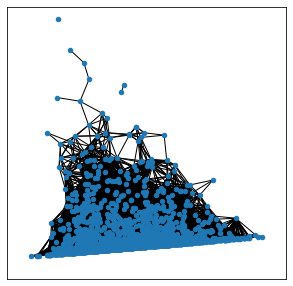

In [28]:
# pos = {n:sample[n,:] for n in range(len(sample))}
pos = [sample[m,:] for m in range(sample.shape[0])]
plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos=pos, with_labels = False,node_size = 20)
plt.axis('equal')
plt.show()

Hacemos 9 diferentes radios y visualisamos cuales de estos tienen una buena explicacion de los datos sin hacer una conexion entre todos los datos.

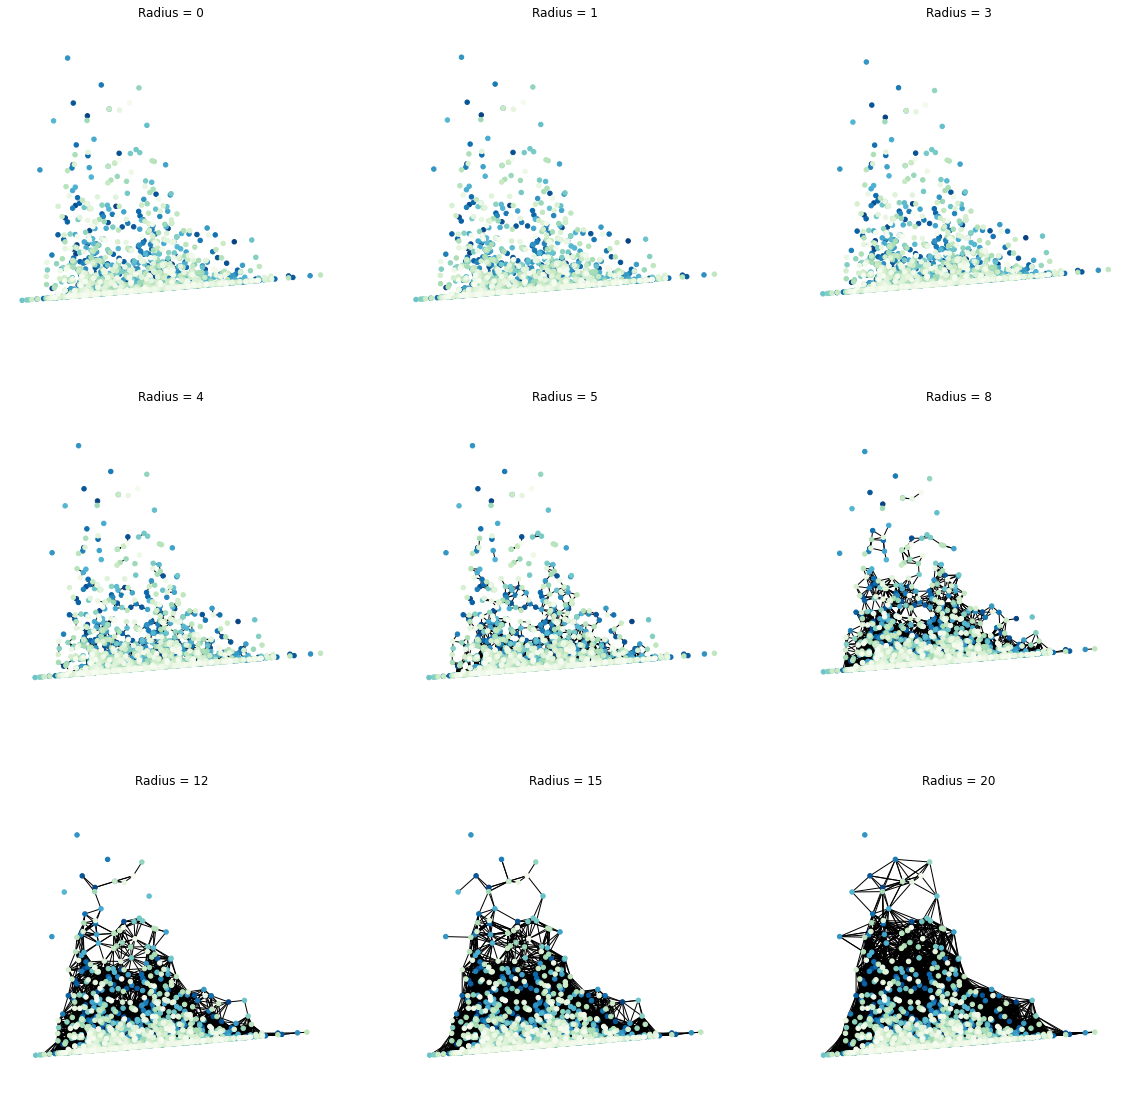

In [135]:
rs = [0,1,3,4,5,8,12,15,20]

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    # nx.draw_networkx(G,pos=pos, with_labels = False,node_size = 20)
    nx.draw(G, pos=pos, node_color=range(size), node_size=20, cmap=plt.cm.GnBu_r)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

### Homologia de alta dimension

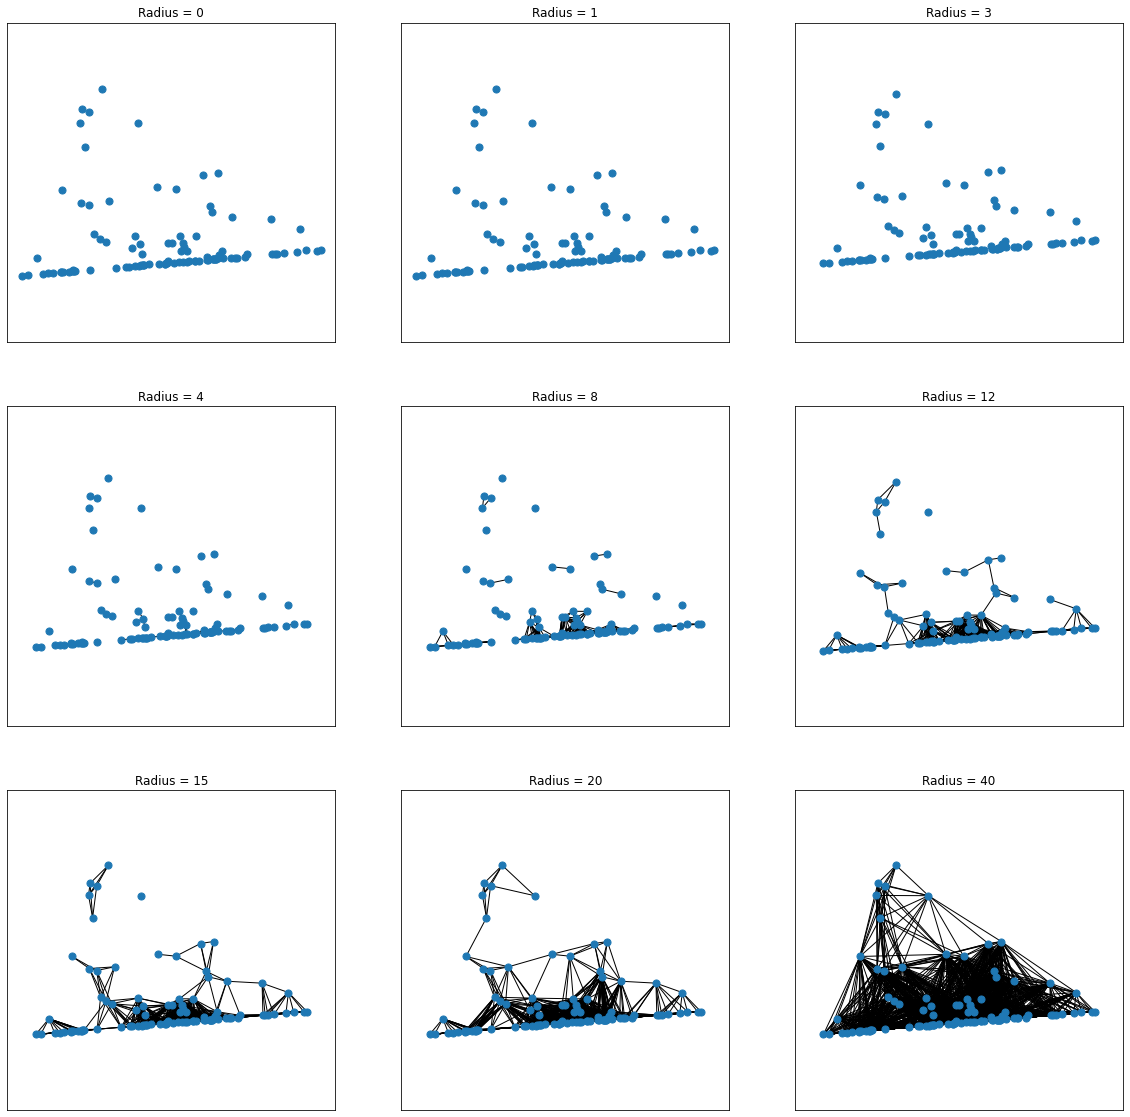

In [79]:
rs = [0,1,3,4,8,12,15,20,40]
pos = {n:sample[n,:] for n in range(len(sample))}

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

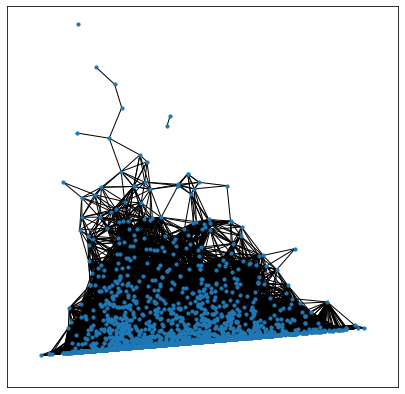

In [29]:
plt.figure(figsize = (7,7))
r = 15
G = create_simplicial_complex(D,r)
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 10)
plt.axis('equal')
plt.show()

In [19]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

In [30]:
G, two_spx_list = create_2_dim_simplicial_complex(D,r)

In [ ]:
patches = []

for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

Creamos ahora un complejo de dos dimensiones. Este es de dos dimensiones porque el color que se muestra al llenar por dentro los complejos conectados demuestra una dimension mas alta a la mostrada anteriormente. En este caso utilizamos parametros de -50 a 50 en el eje x y -10 a 50 en el eje y para mostrar alrededor de 96% de la figura. Extendernos mas atras hace que sea mas dificil apreciar toda la figura.

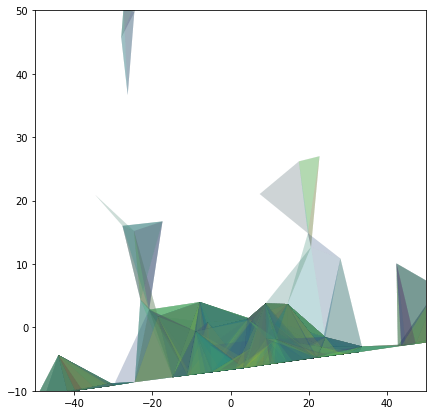

In [85]:
fig, ax = plt.subplots(figsize = (7,7))

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.1)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.xlim([-50, 50])
plt.ylim([-10, 50])
plt.show()

Visualizamos la figura anterrior, pero reducimos la opacidad del color.

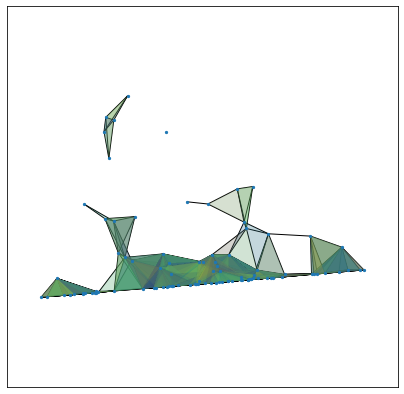

In [86]:
fig, ax = plt.subplots(figsize = (7,7))

nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 5)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.1)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.axis('equal')
plt.show()

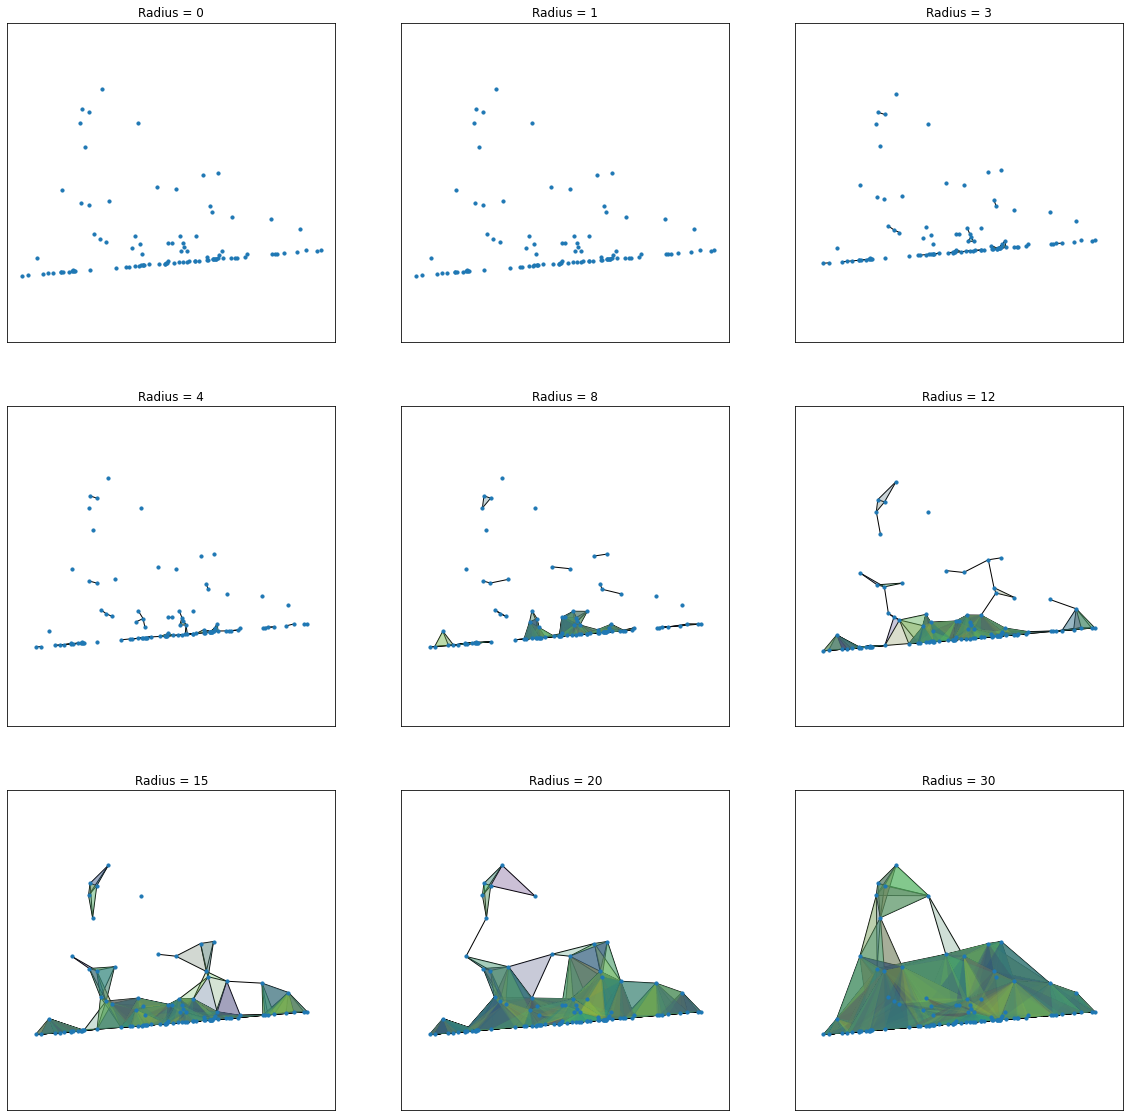

In [88]:
plt.figure(figsize = (20,20))
rs = [0,1,3,4,8,12,15,20,30]
pos = {n:sample[n,:] for n in range(len(sample))}

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 10)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.1)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

### Diagramas de persistencia y codigos de bara

In [25]:
import gudhi as gd

In [26]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 2)

In [27]:
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
for splx in rips_list[0:200] :
    print(splx)

Number of Simplices: 491687
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([50], 0.0)
([51], 0.0)
([52], 0.0)
([53], 0.0)
([54], 0.0)
([55], 0.0)
([56], 0.0)
([57], 0.0)
([58], 0.0)
([59], 0.0)
([60], 0.0)
([61], 0.0)
([62], 0.0)
([63], 0.0)
([64], 0.0)
([65], 0.0)
([66], 0.0)
([67], 0.0)
([68], 0.0)
([69], 0.0)
([70], 0.0)
([71], 0.0)
([72], 0.0)
([73], 0.0)
([74], 0.0)
([75], 0.0)
([76], 0.0)
([77], 0.0)
([78], 0.0)
([79], 0.0)
([80], 0.0)
([81], 0.0

In [28]:
BarCodes = Rips_complex.persistence()
BarCodes

[(1, (1.9618258409803246, inf)),
 (1, (1.9688760875206612, inf)),
 (1, (1.8308589920361382, inf)),
 (1, (1.8304340922221833, inf)),
 (1, (1.7919182663634854, inf)),
 (1, (1.7379132508315542, inf)),
 (1, (1.6953934247717553, inf)),
 (1, (1.9211907761395755, inf)),
 (1, (1.6199467835771626, inf)),
 (1, (1.2209933789939946, inf)),
 (1, (1.9176494265713102, inf)),
 (1, (1.9855771734701961, inf)),
 (1, (1.9174142956410467, inf)),
 (1, (1.153421514834785, 1.8869723880602598)),
 (1, (1.0127569581929623, 1.6576787510975604)),
 (1, (1.2813443146440315, 1.8328578959811634)),
 (1, (1.359451976457107, 1.910466948319902)),
 (1, (1.1623143587831615, 1.7078797335901148)),
 (1, (1.1952832394437305, 1.7110516139886445)),
 (1, (1.514271256895377, 1.9842659470629658)),
 (1, (1.1279741628002649, 1.581604451206294)),
 (1, (1.0065801935217185, 1.4244257022425184)),
 (1, (1.4613220102056514, 1.8539136888092298)),
 (1, (0.9283401794617349, 1.3055594539777242)),
 (1, (1.1603693083209499, 1.534891754421642)),
 

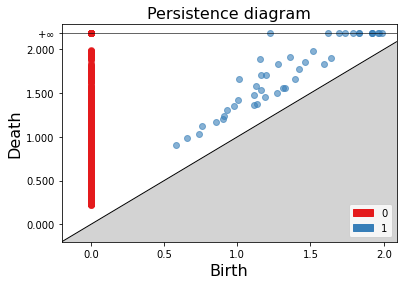

In [31]:
gd.plot_persistence_diagram(BarCodes, legend=True)
plt.show()

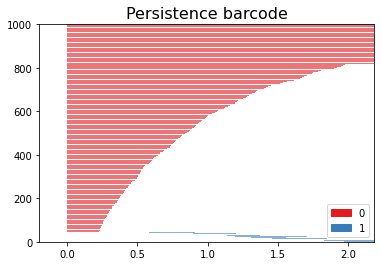

In [33]:
gd.plot_persistence_barcode(BarCodes, legend=True)
plt.show()